In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('../data/raw/Base_dados - Rotatividade RH.xlsx', engine = 'openpyxl')
df.columns= [x.lower() for x in df.columns]
df.head()

#url = 'https://github.com/matheusmello-o/turnover-optmization/raw/refs/heads/main/Base_dados%20-%20Rotatividade%20RH.xlsx'

# df = pd.read_excel(url, engine = 'openpyxl')
# df.columns = [x.lower() for x in df.columns]
# df.head()

,data_contratacao,data_desligamento,meses_de_servico,idade,pontuacao_desempenho,satisfacao_trabalho,nivel_cargo,salario,horas_extras,desligamento
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   data_contratacao      650 non-null    datetime64[ns]
 1   data_desligamento     144 non-null    datetime64[ns]
 2   meses_de_servico      650 non-null    int64         
 3   idade                 650 non-null    int64         
 4   pontuacao_desempenho  650 non-null    float64       
 5   satisfacao_trabalho   650 non-null    float64       
 6   nivel_cargo           650 non-null    object        
 7   salario               650 non-null    float64       
 8   horas_extras          650 non-null    float64       
 9   desligamento          650 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 50.9+ KB


In [13]:
df['data_contratacao'] = df.data_contratacao.dt.date
df['data_desligamento'] = df.data_desligamento.dt.date

In [14]:
df.describe()

,meses_de_servico,idade,pontuacao_desempenho,satisfacao_trabalho,salario,horas_extras,desligamento
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,18.690769,28.349231,3.027463,2.940577,6131.587062,10.098864,0.221538
std,9.652262,8.014983,1.174226,1.148514,2689.075566,6.242406,0.415602
min,3.000000,18.000000,1.000242,1.002868,2004.500000,0.003734,0.000000
25%,10.000000,22.000000,1.988753,1.968571,4023.752500,4.978000,0.000000
50%,19.000000,27.000000,3.058911,2.923458,5562.950000,9.413546,0.000000
75%,27.000000,33.000000,4.022709,3.964356,7814.480000,14.749310,0.000000
max,35.000000,49.000000,4.992102,4.999415,11957.290000,41.638350,1.000000


array([[<Axes: title={'center': 'meses_de_servico'}>,
        <Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'pontuacao_desempenho'}>],
       [<Axes: title={'center': 'satisfacao_trabalho'}>,
        <Axes: title={'center': 'salario'}>,
        <Axes: title={'center': 'horas_extras'}>],
       [<Axes: title={'center': 'desligamento'}>, <Axes: >, <Axes: >]],
      dtype=object)

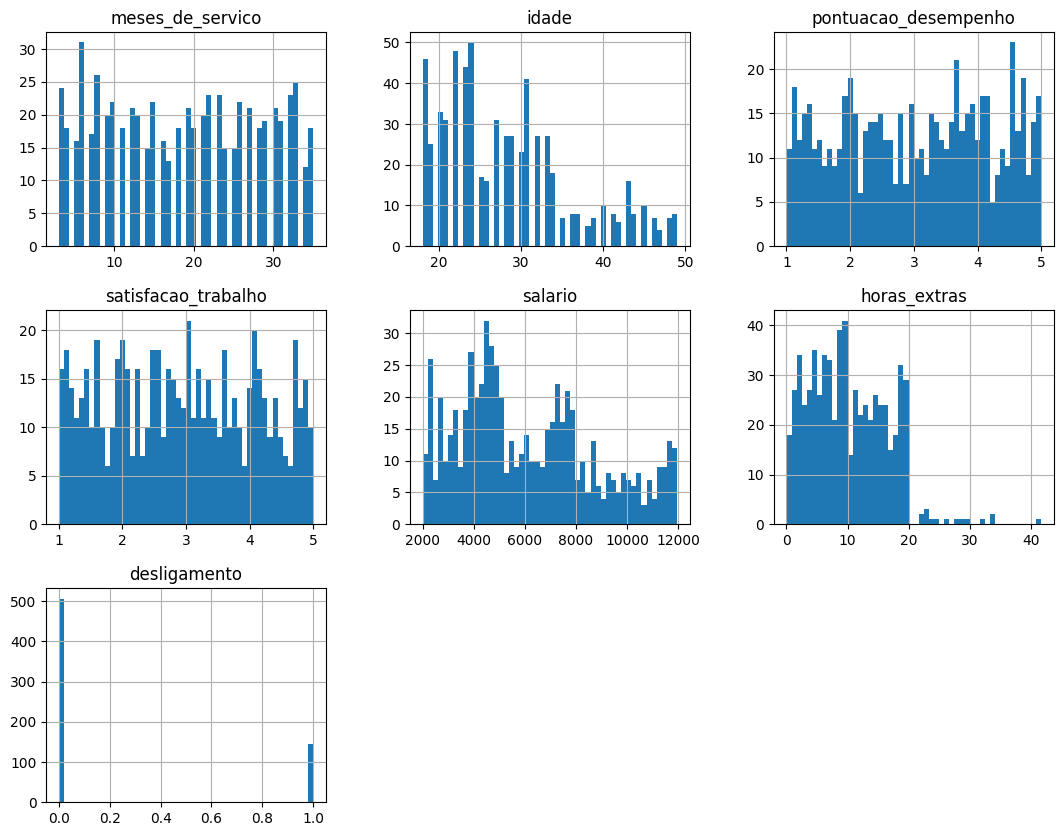

In [16]:
df.hist(figsize=(13, 10), bins = 50)

# <font color = 'gold'> Separating - Train and Test samples </font>

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

def strat_func(df):
	df = df.copy()
	shuffle = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)
	for train_index, test_index in shuffle.split(X = df, y = df.desligamento):
		train_set = df.loc[train_index]
		test_set = df.loc[test_index]
	return train_set, test_set

train_set, test_set = strat_func(df)

# <font color = 'gold'> Exploratory Data Analysis </font>

In [19]:
# checking null data
train_set.isnull().sum()

data_contratacao          0
data_desligamento       405
meses_de_servico          0
idade                     0
pontuacao_desempenho      0
satisfacao_trabalho       0
nivel_cargo               0
salario                   0
horas_extras              0
desligamento              0
dtype: int64

In [20]:
train_set.nunique()

data_contratacao         33
data_desligamento         1
meses_de_servico         33
idade                    32
pontuacao_desempenho    520
satisfacao_trabalho     520
nivel_cargo               3
salario                 520
horas_extras            431
desligamento              2
dtype: int64

In [ ]:
# checking negative numbers
(train_set.select_dtypes(include = np.number) < 0).any()

meses_de_servico        False
idade                   False
pontuacao_desempenho    False
satisfacao_trabalho     False
salario                 False
horas_extras            False
desligamento            False
dtype: bool

In [21]:
train_set.desligamento.value_counts(normalize = True)

desligamento
0    0.778846
1    0.221154
Name: proportion, dtype: float64

<Axes: >

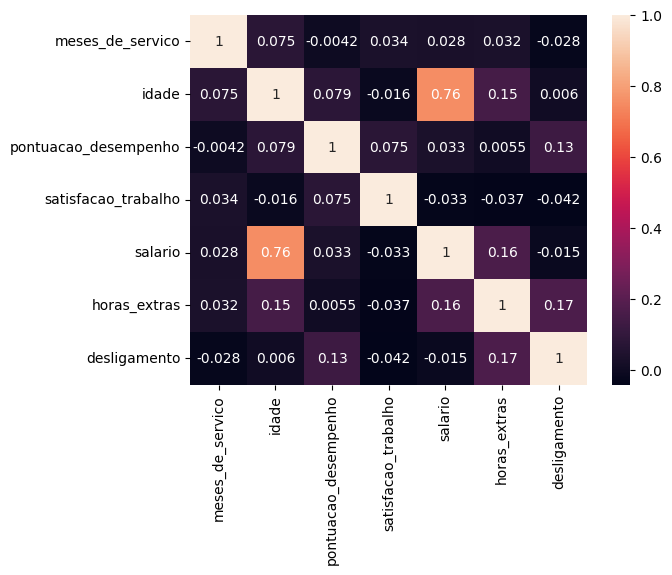

In [15]:
cperson = train_set.corr(method = 'pearson', numeric_only = True)
sns.heatmap(data = cperson, annot = True)

<Axes: xlabel='desligamento', ylabel='salario'>

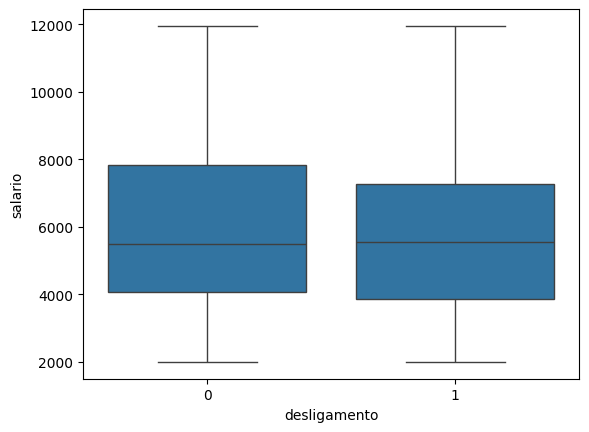

In [16]:
sns.boxplot(data = train_set,
            x = 'desligamento',
            y = 'salario')

<Axes: xlabel='nivel_cargo', ylabel='salario'>

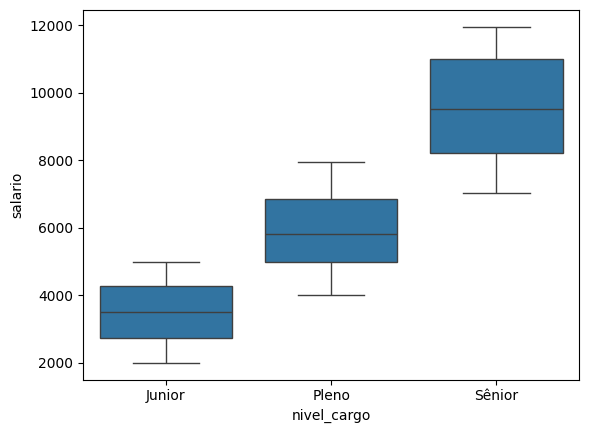

In [17]:
sns.boxplot(data = train_set,
            x = 'nivel_cargo',
            y = 'salario',
            order = ['Junior', 'Pleno', 'Sênior'])

<Axes: xlabel='nivel_cargo', ylabel='pontuacao_desempenho'>

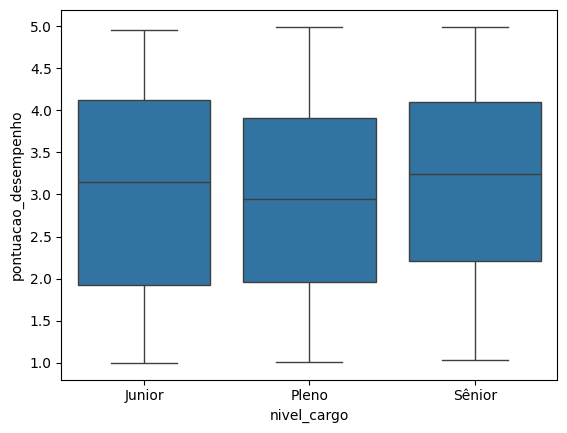

In [18]:
sns.boxplot(data = train_set,
            x = 'nivel_cargo',
            y = 'pontuacao_desempenho',
            order = ['Junior', 'Pleno', 'Sênior'])

<Axes: xlabel='nivel_cargo', ylabel='satisfacao_trabalho'>

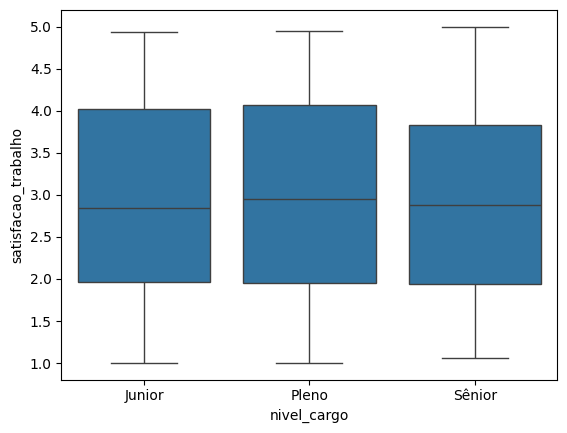

In [19]:
sns.boxplot(data = train_set,
            x = 'nivel_cargo',
            y = 'satisfacao_trabalho',
            order = ['Junior', 'Pleno', 'Sênior'])

<Axes: xlabel='meses_de_servico', ylabel='satisfacao_trabalho'>

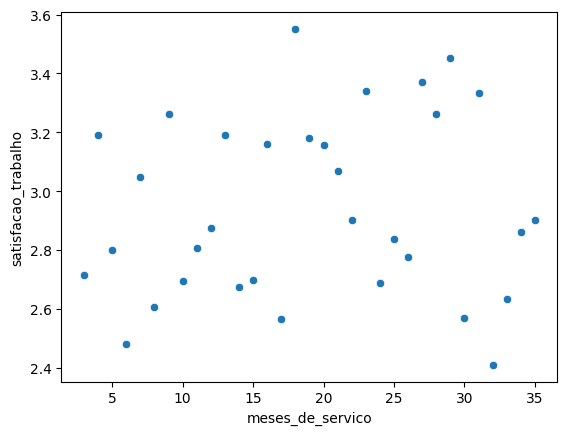

In [20]:
satisfacao_trabalho_meses_servico = train_set.groupby(['meses_de_servico']).satisfacao_trabalho.mean().reset_index()
sns.scatterplot(data = satisfacao_trabalho_meses_servico,
                x = 'meses_de_servico',
                y = 'satisfacao_trabalho')

Text(0.5, 1.0, 'Média da Satisfacao no Trabalho por Meses de Serviço')

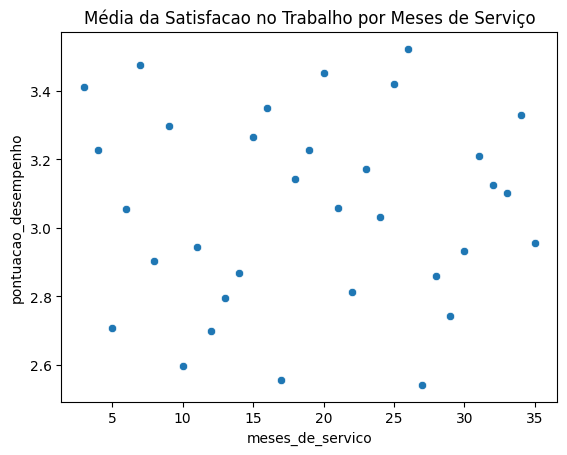

In [21]:
satisfacao_trabalho_meses_servico = train_set.groupby(['meses_de_servico']).pontuacao_desempenho.mean().reset_index()
sns.scatterplot(data = satisfacao_trabalho_meses_servico,
                x = 'meses_de_servico',
                y = 'pontuacao_desempenho')
plt.title('Média da Satisfacao no Trabalho por Meses de Serviço')

Text(0.5, 1.0, 'Média da Pontuacao de Desempenho no Trabalho por Anos de Serviço')

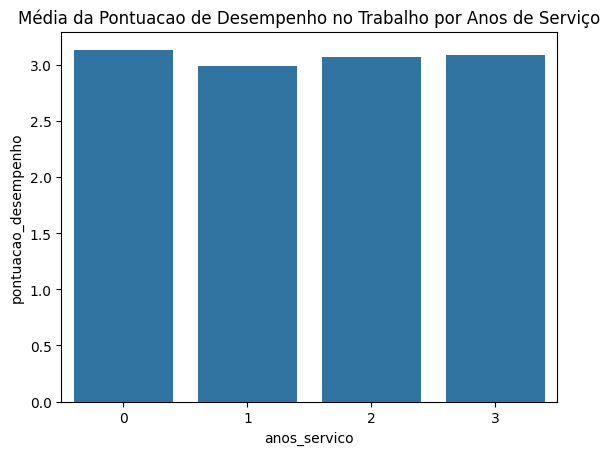

In [22]:
train_set['anos_servico'] = ((train_set.meses_de_servico / 12) + 0.5).astype(int)
desempenho_trabalho_anos_servico = train_set.groupby(['anos_servico']).pontuacao_desempenho.mean().reset_index()
sns.barplot(data = desempenho_trabalho_anos_servico,
                x = 'anos_servico',
                y = 'pontuacao_desempenho')
plt.title('Média da Pontuacao de Desempenho no Trabalho por Anos de Serviço')

Text(0.5, 1.0, 'Média da Satisfacao no Trabalho por Meses de Serviço')

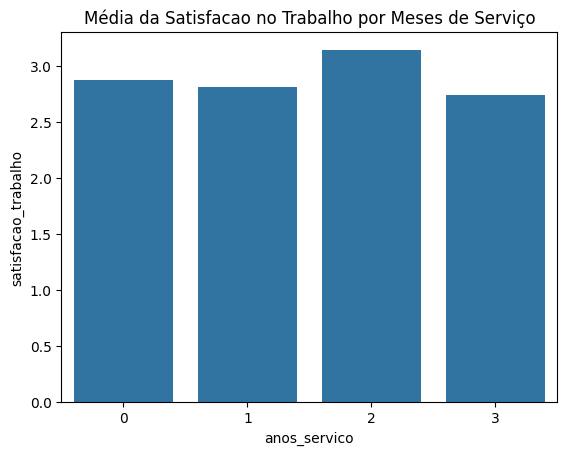

In [23]:
satisfacao_trabalho_anos_servico = train_set.groupby(['anos_servico']).satisfacao_trabalho.mean().reset_index()
sns.barplot(data = satisfacao_trabalho_anos_servico,
                x = 'anos_servico',
                y = 'satisfacao_trabalho')
plt.title('Média da Satisfacao no Trabalho por Meses de Serviço')